<a href="https://colab.research.google.com/github/rbbh/ARIMA-SVR-PSO-ensemble/blob/master/30_Experiments_of_ARIMA_%2B_(SVR_%2B_PSO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import svm
from mpl_toolkits.mplot3d import axes3d, Axes3D
from google.colab import files

In [0]:
import io
import pandas as pd

In [3]:
uploaded = files.upload()   

Saving airlines2.txt to airlines2.txt


In [0]:
data = pd.read_csv(io.BytesIO(uploaded['airlines2.txt']))

In [5]:
uploaded = files.upload()

Saving airlines2_ARIMA.txt to airlines2_ARIMA.txt


In [0]:
data_ARIMA = pd.read_csv(io.BytesIO(uploaded['airlines2_ARIMA.txt']))

In [7]:
uploaded = files.upload()

Saving airlines2_r.txt to airlines2_r.txt


In [0]:
data_r = pd.read_csv(io.BytesIO(uploaded['airlines2_r.txt']))

In [9]:
data_r.describe()

,Residuo
count,144.000000
mean,2.832599
std,29.757948
min,-86.729834
25%,-15.400285
50%,0.233500
75%,24.658117
max,81.595276


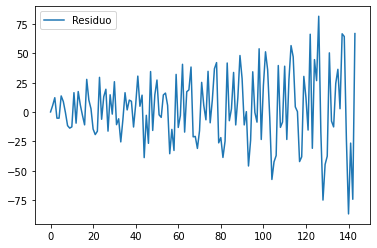

In [10]:
data_r.plot()

In [11]:
len(data)

144

In [0]:
#Scaling the data
from sklearn import preprocessing

data_r_n = data_r.copy()

data_r_n = (data_r - data_r.min())/(data_r.max() - data_r.min())

data_r_n = pd.DataFrame(data_r_n)



In [13]:
# TODO: Create function for the Lag used for the prediction
# We will use 12 for the lag dimension if the series repeats 
# itself annually, 3 if it is trimestrial etc.

# Note: For the "ONS" data base, make "dimensions" = 3
# NOTE: For the "Milk" data base, make "dimensions" = 24

dimensions = 12
data_cn = pd.concat([data_r_n.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_cn)

      Residuo   Residuo   Residuo  ...   Residuo   Residuo   Residuo
0    0.515917       NaN       NaN  ...       NaN       NaN       NaN
1    0.548651  0.515917       NaN  ...       NaN       NaN       NaN
2    0.587900  0.548651  0.515917  ...       NaN       NaN       NaN
3    0.484460  0.587900  0.548651  ...       NaN       NaN       NaN
4    0.484363  0.484460  0.587900  ...       NaN       NaN       NaN
..        ...       ...       ...  ...       ...       ...       ...
139  0.376937  0.897451  0.911189  ...  0.250371  0.070000  0.413713
140  0.000000  0.376937  0.897451  ...  0.292054  0.250371  0.070000
141  0.358242  0.000000  0.376937  ...  0.814766  0.292054  0.250371
142  0.073976  0.358242  0.000000  ...  0.469495  0.814766  0.292054
143  0.912230  0.073976  0.358242  ...  0.440188  0.469495  0.814766

[144 rows x 13 columns]


In [14]:
# Splitting the residual data into train, validation and test

from sklearn.model_selection import train_test_split

X = data_cn.iloc[12:,1:]

y = data_cn.iloc[12:,0]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3939, shuffle = False)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size = 0.5384, shuffle = False)


print(len(y_val))
print(len(y_test))
print(len(y_train))


24
28
80


In [15]:
dimensions = 12
data_c2n = pd.concat([data_ARIMA.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c2n)

          ARIMA       ARIMA       ARIMA  ...       ARIMA       ARIMA       ARIMA
0    111.888000         NaN         NaN  ...         NaN         NaN         NaN
1    112.378158  111.888000         NaN  ...         NaN         NaN         NaN
2    119.771433  112.378158  111.888000  ...         NaN         NaN         NaN
3    134.183102  119.771433  112.378158  ...         NaN         NaN         NaN
4    126.199377  134.183102  119.771433  ...         NaN         NaN         NaN
..          ...         ...         ...  ...         ...         ...         ...
139  629.281833  557.666302  468.353843  ...  451.586191  537.947070  576.091574
140  594.729834  629.281833  557.666302  ...  399.569768  451.586191  537.947070
141  487.428775  594.729834  629.281833  ...  354.584335  399.569768  451.586191
142  464.277816  487.428775  594.729834  ...  424.702000  354.584335  399.569768
143  365.178562  464.277816  487.428775  ...  403.635172  424.702000  354.584335

[144 rows x 13 columns]


In [16]:
# Splitting the ARIMA predictions into train, validation and test

from sklearn.model_selection import train_test_split

X_ARIMA = data_c2n.iloc[12:,1:]

y_ARIMA = data_c2n.iloc[12:,0]

X_train_ARIMA, X_val_ARIMA, y_train_ARIMA, y_val_ARIMA = train_test_split(X_ARIMA, y_ARIMA, test_size = 0.3939, shuffle = False)

X_val_ARIMA, X_test_ARIMA, y_val_ARIMA, y_test_ARIMA = train_test_split(X_val_ARIMA, y_val_ARIMA, test_size = 0.5384, shuffle = False)

print(len(y_val_ARIMA))
print(len(y_test_ARIMA))
print(len(y_train_ARIMA))

24
28
80


In [17]:
dimensions = 12
data_c3n = pd.concat([data.shift(i) for i in range(0 + dimensions + 1)], axis = 1)

print(data_c3n)

       X      X      X      X      X  ...      X      X      X      X      X
0    112    NaN    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
1    118  112.0    NaN    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
2    132  118.0  112.0    NaN    NaN  ...    NaN    NaN    NaN    NaN    NaN
3    129  132.0  118.0  112.0    NaN  ...    NaN    NaN    NaN    NaN    NaN
4    121  129.0  132.0  118.0  112.0  ...    NaN    NaN    NaN    NaN    NaN
..   ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
139  606  622.0  535.0  472.0  461.0  ...  405.0  362.0  407.0  463.0  559.0
140  508  606.0  622.0  535.0  472.0  ...  417.0  405.0  362.0  407.0  463.0
141  461  508.0  606.0  622.0  535.0  ...  391.0  417.0  405.0  362.0  407.0
142  390  461.0  508.0  606.0  622.0  ...  419.0  391.0  417.0  405.0  362.0
143  432  390.0  461.0  508.0  606.0  ...  461.0  419.0  391.0  417.0  405.0

[144 rows x 13 columns]


In [18]:
# Splitting the raw data into train, validation and test

from sklearn.model_selection import train_test_split

X_raw = data_c3n.iloc[12:,1:]

y_raw = data_c3n.iloc[12:,0]

X_train_raw, X_val_raw, y_train_raw, y_val_raw = train_test_split(X_raw, y_raw, test_size = 0.3939, shuffle = False)

X_val_raw, X_test_raw, y_val_raw, y_test_raw = train_test_split(X_val_raw, y_val_raw, test_size = 0.5384, shuffle = False)

print(len(y_val_raw))
print(len(y_test_raw))
print(len(y_train_raw))

24
28
80


In [0]:
def pso(n_particles, iterations, dimensions, inertia, experiments):

    # Range of SVR's hyperparameters (Particles' search space)
    # C, Epsilon and Gamma
    max_c = 1e4
    min_c = 1e-3
    max_e = 1e-1
    min_e = 1e-8
    max_g = 1e3
    min_g = 1e-3
    

    # Initializing regression variables    
    p_best_RGS = np.empty((n_particles), dtype = object);
    g_best_RGS = sys.maxsize

    # Initializing variables for experiment collection
    g_bests = []
    g_bests_RGS_experiment = []
    mse_residuals = []
    final_experiment_predictions = []

    last_configurations = []
    
    average_particles = []
    mse_averages = []
    final_experiment_averages = []

    median_particles = []
    mse_medians = []
    final_experiment_medians = []
    
    mse_ARIMA = []
    mse_ensemble = []


    from sklearn.metrics import mean_squared_error

    for e in range(experiments):
      
        # Initializing particles' positions randomly, inside
        # the search space
        x = np.random.rand(n_particles, 1)*(max_c - min_c) + min_c
        y = np.random.rand(n_particles, 1)*(max_e - min_e) + min_e
        z = np.random.rand(n_particles, 1)*(max_g - min_g) + min_g

        c = np.concatenate((x,y,z), axis=1)

        if(e == 0):
            # Displaying tridimensional search space
            plot(c)

        # Initializing particles' parameters
        v = np.zeros((n_particles, dimensions))
        c1 = 2
        c2 = 2
        p_best = np.zeros((n_particles, dimensions))
        p_best_val = np.zeros(n_particles) + sys.maxsize  
        g_best = np.zeros(dimensions)
        g_best_val = sys.maxsize

        best_iter = np.zeros(iterations)

        for i in range(iterations):

            for j in range(n_particles):
              # Starting Regression
              rgs = svm.SVR(C = c[j][0], epsilon = c[j][1], gamma = c[j][2])

              # Fitting the curve
              rgs.fit(X_train, y_train)
              y_predict = rgs.predict(X_val)

              # Using Mean Squared Error to verify prediction accuracy
              mse = mean_squared_error(y_val, y_predict) 

              # If mse value for that search point, for that particle,
              # is less than its personal best point,
              # replace personal best
              if(mse < p_best_val[j]):   
                  # The value below represents the current least Mean Squared Error
                  p_best_val[j] = mse
                  
                  # The value below represents the current least Regressor
                  p_best_RGS[j] = rgs
                              

                  # The value below represents the current search coordinates for
                  # the particle's current least Mean Squared Error found
                  p_best[j] = c[j].copy()
                  
              # Using auxiliar variable to get the index of the
              # particle that found the configuration with the 
              # minimum MSE value
              aux = np.argmin(p_best_val)        
            
              if(p_best_val[aux] < g_best_val):
                  # Assigning Particle's current best MSE to the Group's best    
                  g_best_val = p_best_val[aux]

                  # Assigning Particle's current best configuration to the Group's best
                  g_best = p_best[aux].copy()

                  # Group best regressor:
                  # the combination of C, Epsilon and Gamma
                  # that computes the best fitting curve
                  g_best_RGS = p_best_RGS[aux]

            
              rand1 = np.random.random()
              rand2 = np.random.random()

              # The variable below influences directly the particle's velocity.
              # It can either make it smaller or bigger. 
              w = inertia

              # The equation below represents Particle's velocity, which is
              # the rate of change in its position
              v[j] = w*v[j] + c1*(p_best[j] - c[j])*rand1 + c2*(g_best - c[j])*rand2

              # Change in the Particle's position 
              c[j] = c[j] + v[j]

              # Below is a series of conditions that stop the particles from
              # leaving the search space
              if(c[j][2] < min_g):
                c[j][2] = min_g
              if(c[j][2] > max_g):
                c[j][2] = max_g
              if(c[j][1] < min_e):
                c[j][1] = min_e
              if(c[j][1] > max_e):
                c[j][1] = max_e
              if(c[j][0] < min_c):
                c[j][0] = min_c
              if(c[j][0] > max_c):
                c[j][0] = max_c
                
        
        # Storing last particles` positions
        # for later use
        last_configurations.append(c)

        # Making the prediction with the best configuration of C, Epsilon and
        # Gamma found by the particles
        predict_test = g_best_RGS.predict(X_test)

        g_bests_RGS_experiment.append(g_best_RGS)
        g_bests.append(g_best)

        mse_r = mean_squared_error(y_test, predict_test)
        mse_residuals.append(mse_r)

    
        # Taking all particles' final predictions and
        # getting their averages and medians
        average_p, median_p = particles_last_predictions(c, n_particles)

        average_particles.append(average_p)
        median_particles.append(median_p)
        
        mse_e, mse_AR = residual_performance(predict_test, y_test_ARIMA, y_test_raw)

        mse_ARIMA.append(mse_AR)
        mse_ensemble.append(mse_e)

        mse_A, mse_AR = residual_performance(average_p, y_test_ARIMA, y_test_raw)
        mse_averages.append(mse_A)

        mse_M, mse_AR = residual_performance(median_p, y_test_ARIMA, y_test_raw)
        mse_medians.append(mse_M)

        final_exp_p, final_exp_av, final_exp_md = results(g_best_RGS, average_p, median_p)

        final_exp_p = final_exp_p.tolist()
        final_exp_av = final_exp_av.tolist()
        final_exp_md = final_exp_md.tolist()

        final_experiment_predictions.append(final_exp_p)
        final_experiment_averages.append(final_exp_av)
        final_experiment_medians.append(final_exp_md)

        print('\nExperiment # %d: done. MSE: %f\n'%(e+1, mse_e)) 


    aux_result_1 = np.argmin(mse_ensemble)
    mse_final = mse_ensemble[aux_result_1]

    #print('Debug 1')

    aux_result_2 = np.argmin(mse_residuals)
    best_regression = g_bests_RGS_experiment[aux_result_2]
    best_configuration = g_bests[aux_result_2]

    c = last_configurations[aux_result_2]
    
    probable_best_predictions = final_experiment_predictions[aux_result_2]
    probable_best_average = final_experiment_averages[aux_result_2]
    probable_best_median = final_experiment_medians[aux_result_2]

    #print('Debug 2')

    display_results(best_regression, probable_best_predictions, probable_best_average, probable_best_median, c)

    #print('Debug 3')

    print(color.BOLD + '\nBest Result: Experiment # %d . Mean Squared Error = %f\n'%(aux_result_1+1, mse_final) + color.BOLD )  


    pd.options.display.float_format = '${:,.2f}'.format
    final_results = pd.DataFrame()

    final_results["Melhores Configuracoes (G_Bests)"] = g_bests
    final_results["Previsoes com o G_Best (Sistema Final)"] = "="

    for e in range(experiments):
        for p in range(len(predict_test)):
            final_results["Pred_" + str(p+1)] = final_experiment_predictions[e][p]   

    final_results["Previsoes com as Medias"] = "="

    for e in range(experiments):   
        for p in range(len(predict_test)):
            final_results["Av_Pred_" + str(p+1)] = final_experiment_averages[e][p]

    final_results["Previsoes com as Medianas"] = "="

    for e in range(experiments):
        for p in range(len(predict_test)):
            final_results["Md_Pred_" + str(p+1)] = final_experiment_medians[e][p]

    final_results["MSE da Previsao do Sistema Final"] = mse_ensemble
    final_results["MSE da Previsao das Medias"] = mse_averages
    final_results["MSE da Previsao das Medianas"] = mse_medians
    final_results["MSE da Previsao do ARIMA"] = mse_ARIMA


    final_results.to_csv("Airlines_Experiments_Inertia_" + str(w) + "_.csv", index = False, header = True)

In [0]:
def residual_performance(residual_predictions, ARIMA_predictions, raw_data):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st


    r_tmp = residual_predictions
    ARIMA = ARIMA_predictions
    data = raw_data

    # Un-scalling the residuals
    
    r = r_tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())

        
    final_predictions = r + ARIMA
  

    mse1 = mean_squared_error(final_predictions, data)

    mse2 = mean_squared_error(ARIMA, data)
    

    return mse1, mse2

In [0]:
def particles_last_predictions(configurations, particles):
    
    from sklearn.metrics import mean_squared_error 
    import statistics as st
    
    predictions = []

    for p in range(particles):

        rgs = svm.SVR(C = configurations[p][0], epsilon = configurations[p][1], gamma = configurations[p][2])

        rgs.fit(X_val, y_val)  ### TODO: Necessário verificar com que conjunto deve ser feito o "ajuste"
        y_predict = rgs.predict(X_test) 

        predictions.append(y_predict)
    
    #print('Debug inside 1')

    total = [sum(x) for x in zip(*predictions)]
    #print('Debug inside 2')  
    
    average = [num/particles for num in total]
    #print('Debug inside 3')



    median = [st.median(num) for num in zip(*predictions)]
    #print('Debug inside 5')


    return average, median

In [0]:
def results(regression, average, median):
    
    import numpy as np

    data = y_test_raw
    ARIMA = y_test_ARIMA
    ARIMA = ARIMA.to_list()
    test = X_test

    average_residuals = average
    median_residuals = median

    #print('Debug Inside 1')

    #print(regression)
    
    tmp = regression.predict(test)
    #print('Debug Inside 2')


    residuals = tmp*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_A = average_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    residuals_M = median_residuals*(np.asarray(data_r.max()) - np.asarray(data_r.min())) + np.asarray(data_r.min())
    

    final_predictions = ARIMA + residuals
    final_predictions_average = ARIMA + residuals_A
    final_predictions_median = ARIMA + residuals_M
    
    #print('Debug Inside 3')

    
    return final_predictions, final_predictions_average, final_predictions_median


In [0]:
def display_results(configuration, final_predictions, final_predictions_average, final_predictions_median, all_particles):

    from sklearn.metrics import mean_squared_error
    
    data = y_test_raw
    ARIMA = y_test_ARIMA

    plot(all_particles)

    mse_ARIMA = mean_squared_error(ARIMA, data)
    mse = mean_squared_error(final_predictions, data)
    mse_A = mean_squared_error(final_predictions_average, data)
    mse_M = mean_squared_error(final_predictions_median, data)

    print('\nMean Squared Error for the ARIMA Model:\t %f' %mse_ARIMA)
    print('\nBest Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse)
    print('\nMean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_A)
    print('\nMean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:\t %f' %mse_M)
    
    #print('Debug Inside 4')

    print('\nBest Configuration Found:\n')
    print(configuration)

    #print('Debug Inside 5')
    print('\n')
    print('\n')
    print(color.BOLD + '\nARIMA Model series` predicitions:\n' + color.BOLD)

    #print('Debug Inside 6')

    plot_results(ARIMA)  
    
    print(color.BOLD + '\nEnsemble Model series` predicitions:\n' + color.BOLD)

    #print('Debug Inside 6')

    plot_results(final_predictions)

    print(color.BOLD + '\nEnsemble Model best Average series` predicitions:\n' + color.BOLD)

    #print('Debug Inside 7')

    plot_results(final_predictions_average)

    print(color.BOLD + '\nEnsemble Model best Median series` predicitions:\n' + color.BOLD)

    #print('Debug Inside 8')

    plot_results(final_predictions_median)

    print('\n')
    print('\n')

In [0]:
def plot_results(predictions):

    plt.plot(range(len(y_test_raw)), y_test_raw, label='Real')
    plt.plot(range(len(predictions)), predictions, label='Predicted')
    plt.legend()
    plt.show()

In [0]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'



In [0]:
# Function that displays tridimensional plot
def plot(some_list):
 
    ax = Axes3D(plt.figure())
    ax.scatter3D(some_list[:,0], some_list[:,1], some_list[:,2], color = 'r')
    ax.set_xlabel('$C$', fontsize = 20)
    ax.set_ylabel('$\epsilon$', fontsize = 25)
    ax.zaxis.set_rotate_label(False) 
    ax.set_zlabel('$\gamma$', fontsize=30, rotation = 0)
    ax.zaxis._axinfo['label']['space_factor'] = 1.0
    plt.show()

    print('\n')
    print('\n')

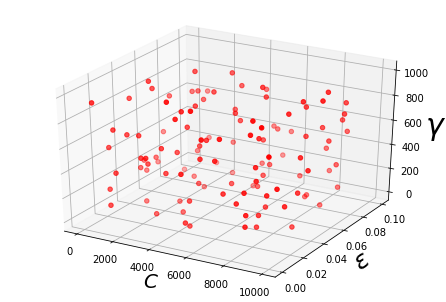






Experiment # 1: done. MSE: 794.800005


Experiment # 2: done. MSE: 794.884896


Experiment # 3: done. MSE: 794.681517


Experiment # 4: done. MSE: 795.663782


Experiment # 5: done. MSE: 795.261682


Experiment # 6: done. MSE: 794.083398


Experiment # 7: done. MSE: 794.862087


Experiment # 8: done. MSE: 794.331630


Experiment # 9: done. MSE: 793.448070


Experiment # 10: done. MSE: 794.199353


Experiment # 11: done. MSE: 793.793352


Experiment # 12: done. MSE: 796.635319


Experiment # 13: done. MSE: 795.082600


Experiment # 14: done. MSE: 793.078747


Experiment # 15: done. MSE: 792.283329


Experiment # 16: done. MSE: 792.337440


Experiment # 17: done. MSE: 794.654002


Experiment # 18: done. MSE: 794.718505


Experiment # 19: done. MSE: 793.402727


Experiment # 20: done. MSE: 794.759241


Experiment # 21: done. MSE: 794.541686


Experiment # 22: done. MSE: 791.982183


Experiment # 23: done. MSE: 794.860365


Experiment # 24: done. MSE: 793.260604


Experiment # 25: don

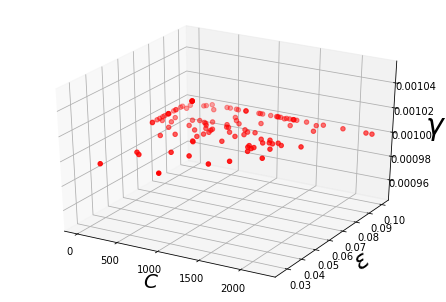






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 791.764515

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 977.960626

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 917.881897

Best Configuration Found:

SVR(C=690.4441476161285, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08280971301506639, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



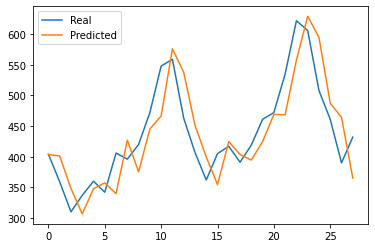


Ensemble Model series` predicitions:



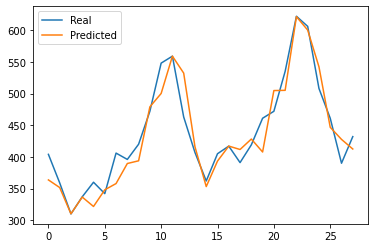


Ensemble Model best Average series` predicitions:



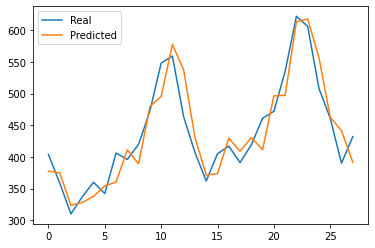


Ensemble Model best Median series` predicitions:



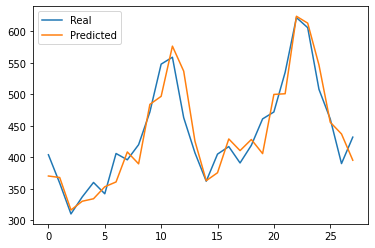






Best Result: Experiment # 30 . Mean Squared Error = 791.764515



In [58]:
pso(120, 100, 3, 1, 30)

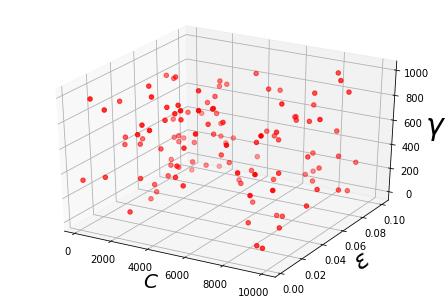






Experiment # 1: done. MSE: 793.291723


Experiment # 2: done. MSE: 875.919048


Experiment # 3: done. MSE: 795.395945


Experiment # 4: done. MSE: 794.026308


Experiment # 5: done. MSE: 793.024314


Experiment # 6: done. MSE: 794.691357


Experiment # 7: done. MSE: 793.790381


Experiment # 8: done. MSE: 792.718758


Experiment # 9: done. MSE: 794.676534


Experiment # 10: done. MSE: 793.242151


Experiment # 11: done. MSE: 794.393952


Experiment # 12: done. MSE: 793.203346


Experiment # 13: done. MSE: 792.869939


Experiment # 14: done. MSE: 793.070385


Experiment # 15: done. MSE: 794.550735


Experiment # 16: done. MSE: 689.989832


Experiment # 17: done. MSE: 795.567048


Experiment # 18: done. MSE: 876.110818


Experiment # 19: done. MSE: 874.995734


Experiment # 20: done. MSE: 794.141956


Experiment # 21: done. MSE: 793.365458


Experiment # 22: done. MSE: 794.680877


Experiment # 23: done. MSE: 795.574436


Experiment # 24: done. MSE: 793.606565


Experiment # 25: don

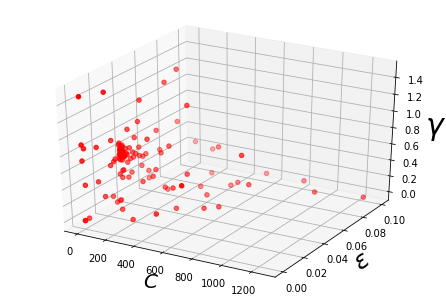






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 689.499620

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 942.532784

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 895.221060

Best Configuration Found:

SVR(C=0.9834656024704451, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.03480828455125036, gamma=0.5541729350827805, kernel='rbf',
    max_iter=-1, shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



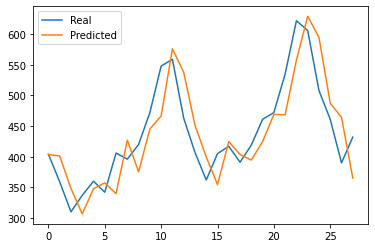


Ensemble Model series` predicitions:



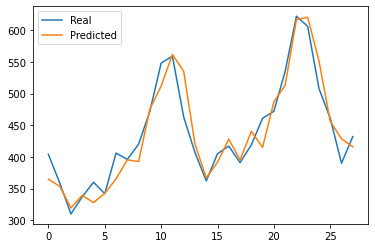


Ensemble Model best Average series` predicitions:



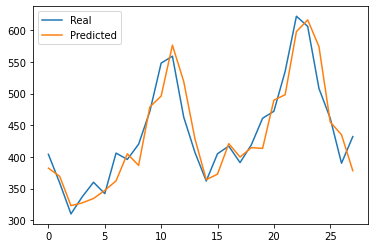


Ensemble Model best Median series` predicitions:



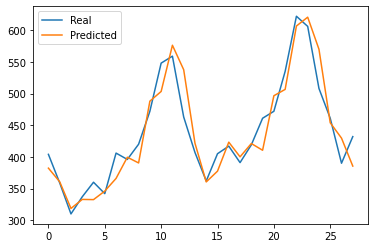






Best Result: Experiment # 25 . Mean Squared Error = 689.499620



In [59]:
pso(120, 100, 3, 0.8, 30)

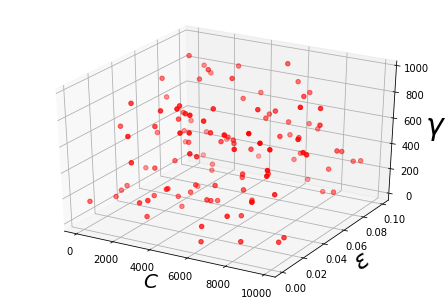






Experiment # 1: done. MSE: 793.138750


Experiment # 2: done. MSE: 794.147320


Experiment # 3: done. MSE: 793.378408


Experiment # 4: done. MSE: 794.189182


Experiment # 5: done. MSE: 793.686785


Experiment # 6: done. MSE: 792.814640


Experiment # 7: done. MSE: 876.321857


Experiment # 8: done. MSE: 792.742212


Experiment # 9: done. MSE: 793.611463


Experiment # 10: done. MSE: 793.599712


Experiment # 11: done. MSE: 794.931700


Experiment # 12: done. MSE: 875.745974


Experiment # 13: done. MSE: 792.813466


Experiment # 14: done. MSE: 793.577584


Experiment # 15: done. MSE: 793.774759


Experiment # 16: done. MSE: 793.689280


Experiment # 17: done. MSE: 793.280059


Experiment # 18: done. MSE: 794.611160


Experiment # 19: done. MSE: 793.379079


Experiment # 20: done. MSE: 793.545944


Experiment # 21: done. MSE: 793.567940


Experiment # 22: done. MSE: 793.569910


Experiment # 23: done. MSE: 793.631826


Experiment # 24: done. MSE: 793.589105


Experiment # 25: don

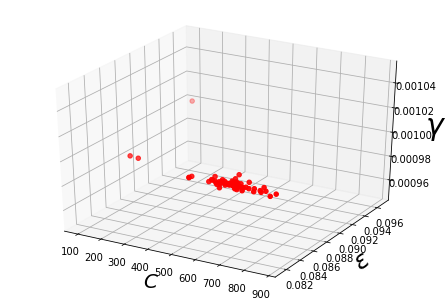






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 792.742212

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 871.666837

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 869.020533

Best Configuration Found:

SVR(C=707.9755484479881, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.08238391372983182, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



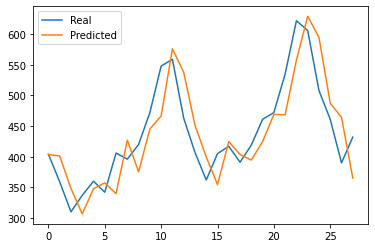


Ensemble Model series` predicitions:



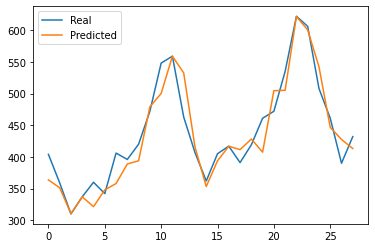


Ensemble Model best Average series` predicitions:



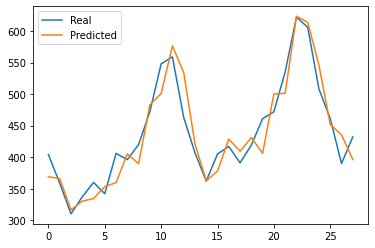


Ensemble Model best Median series` predicitions:



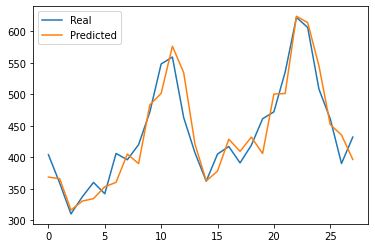






Best Result: Experiment # 8 . Mean Squared Error = 792.742212



In [60]:
pso(120, 100, 3, 0.6, 30)

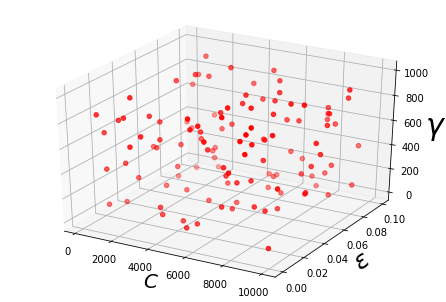






Experiment # 1: done. MSE: 794.347100


Experiment # 2: done. MSE: 792.812316


Experiment # 3: done. MSE: 794.142382


Experiment # 4: done. MSE: 793.604541


Experiment # 5: done. MSE: 793.807784


Experiment # 6: done. MSE: 793.720970


Experiment # 7: done. MSE: 794.153595


Experiment # 8: done. MSE: 792.119308


Experiment # 9: done. MSE: 792.922404


Experiment # 10: done. MSE: 793.467385


Experiment # 11: done. MSE: 793.480668


Experiment # 12: done. MSE: 876.057054


Experiment # 13: done. MSE: 793.854524


Experiment # 14: done. MSE: 792.804127


Experiment # 15: done. MSE: 793.548706


Experiment # 16: done. MSE: 791.781945


Experiment # 17: done. MSE: 801.595525


Experiment # 18: done. MSE: 826.902232


Experiment # 19: done. MSE: 875.735784


Experiment # 20: done. MSE: 875.482315


Experiment # 21: done. MSE: 791.655410


Experiment # 22: done. MSE: 794.969867


Experiment # 23: done. MSE: 792.978381


Experiment # 24: done. MSE: 792.613471


Experiment # 25: don

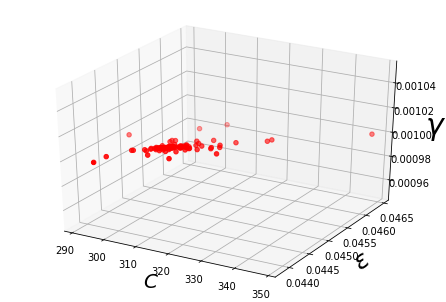






Mean Squared Error for the ARIMA Model:	 2163.507388

Best Mean Squared Error for the ARIMA + (PSO+SVR) Model Ensemble:	 776.498354

Mean Squared Error with the Average for the ARIMA + (PSO+SVR) Model Ensemble:	 851.078788

Mean Squared Error with the Median for the ARIMA + (PSO+SVR) Model Ensemble:	 851.444206

Best Configuration Found:

SVR(C=304.97678218641477, cache_size=200, coef0=0.0, degree=3,
    epsilon=0.04469777641773725, gamma=0.001, kernel='rbf', max_iter=-1,
    shrinking=True, tol=0.001, verbose=False)





ARIMA Model series` predicitions:



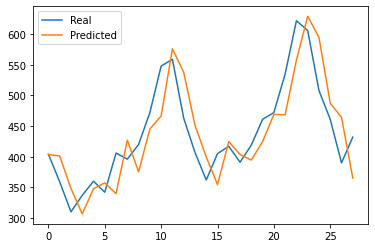


Ensemble Model series` predicitions:



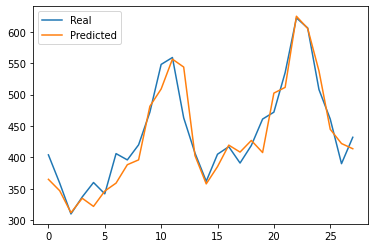


Ensemble Model best Average series` predicitions:



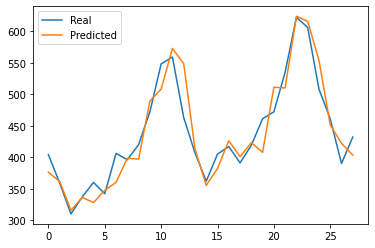


Ensemble Model best Median series` predicitions:



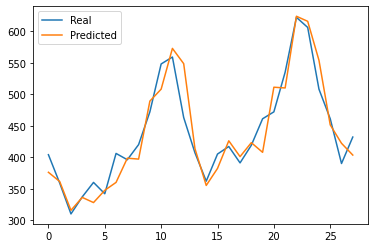






Best Result: Experiment # 26 . Mean Squared Error = 776.498354



In [61]:
pso(120, 100, 3, 0.2, 30)